<a href="https://colab.research.google.com/github/Mariamibrahim223/1D_TISE_Finite_Difference/blob/main/Schrodinger_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Schrodinger Equation (1D):

## Discretization of the Hamiltonian

The time-independent Schrödinger equation in one dimension is given by:
$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x).
$$

To solve this equation numerically, we discretize the spatial domain into a grid of points $(x_i)$ with a uniform spacing $(h)$, where $(x_i = x_0 + i h)$ for $(i = 0, 1, \dots, N-1)$.

### 1. Finite-Difference Approximation of the Second Derivative

The second derivative $(\frac{d^2 \psi(x)}{dx^2})$ is approximated using the central difference formula:

$$
\frac{d^2 \psi(x)}{dx^2} \approx \frac{\psi(x + h) - 2\psi(x) + \psi(x - h)}{h^2}.
$$

Substituting this into the Schrödinger equation gives:

$$
-\frac{\hbar^2}{2m} \frac{\psi(x + h) - 2\psi(x) + \psi(x - h)}{h^2} + V(x)\psi(x) = E\psi(x).
$$

Rewriting, we get:

$$
-\frac{\hbar^2}{2m h^2} \psi(x + h) + \left( \frac{\hbar^2}{m h^2} + V(x) \right) \psi(x) - \frac{\hbar^2}{2m h^2} \psi(x - h) = E\psi(x).
$$

### 2. Matrix Representation of the Hamiltonian
We now represent the wavefunction $(\psi(x))$ as a vector $(\psi = (\psi_0, \psi_1, \dots, \psi_{N-1})^T)$, where $(\psi_i = \psi(x_i))$, and construct the Hamiltonian matrix $(H)$.

The diagonal elements of \(H\) correspond to:

$$
H_{i,i} = \frac{2}{h^2} + \frac{2m}{\hbar^2} V(x_i),
$$

while the off-diagonal elements (representing the coupling between neighboring points) are given by:

$$
H_{i,i-1} = H_{i,i+1} = -\frac{1}{h^2}.
$$

In matrix form, $(H)$ is a tridiagonal matrix:

$$
H = \begin{bmatrix}
\frac{2}{h^2} + V(x_0) & -\frac{1}{h^2} & 0 & \cdots & 0 \\
-\frac{1}{h^2} & \frac{2}{h^2} + V(x_1) & -\frac{1}{h^2} & \cdots & 0 \\
0 & -\frac{1}{h^2} & \frac{2}{h^2} + V(x_2) & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & \frac{2}{h^2} + V(x_{N-1})
\end{bmatrix}.
$$

### 3. Eigenvalue Problem

The Schrödinger equation is now written as a matrix eigenvalue problem:

$$
H \psi = E \psi,
$$

where $(H)$ is the Hamiltonian matrix, $(\psi)$ is the eigenvector representing the wavefunction, and $(E)$ is the eigenvalue corresponding to the energy of the system.

## Algorithm

**- Define constants:**

- Reduced Planck's constant $\hbar$

- Particle mass $m$.
- Domain length $L$

- Number of grid points $N$

**- Discretize the spatial domain:**

- Create a linearly spaced grid $x \in [-L/2, L/2]$

- Compute grid spacing $h = x_{i+1} - x_i$

**- Define the potential**


**- Construct the Hamiltonian matrix $H$:**
- For $i = 1$ to $N-2$:
$$
H[i, i] = \frac{2}{h^2} + V(x_i)
$$
        
$$
H[i, i-1] = H[i, i+1] = -\frac{1}{h^2}
$$
- Handle boundary conditions appropriately.


**-Solve the eigenvalue problem:**
- Compute eigenvalues $E_n$ and eigenvectors $\psi_n$ of $H$ using a numerical solver.

**- Normalize the wavefunctions:**
- For each eigenfunction $\psi_n$, normalize using:


$$
\psi_n = \frac{\psi_n}{\sqrt{h}}
$$

**- Plot results:**

- Plot the periodic potential $V(x)$.

- Plot the first few wavefunctions $\psi_n(x)$ shifted vertically by their corresponding energies $E_n$.



In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from matplotlib.animation import FuncAnimation

## Potential Step

The time-independent Schrödinger equation for a particle of mass $m$ in a potential $V(x)$ is given by:


$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)
$$

For a potential step at $x=0$ with $V(x)$ defined as:

$$
V(x) =
\begin{cases}
0 & \text{for } x < 0 \\
V_0 & \text{for } x \geq 0
\end{cases}
$$


we consider two regions:
- Region I: $x < 0$
- Region II: $x \geq 0$

### Region I ($x < 0$):

The Schrödinger equation in this region is:

$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} = E\psi(x)
$$

which simplifies to:

$$
\frac{d^2 \psi(x)}{dx^2} + k_1^2 \psi(x) = 0
$$

where $k_1 = \sqrt{\frac{2mE}{\hbar^2}}$. The general solution in Region I is:

$$
\psi_I(x) = A e^{ik_1x} + B e^{-ik_1x}
$$

### Region II ($x \geq 0$):

The Schrödinger equation in this region is:

$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V_0 \psi(x) = E\psi(x)
$$

which simplifies to:

$$
\frac{d^2 \psi(x)}{dx^2} + k_2^2 \psi(x) = 0
$$

where $k_2 = \sqrt{\frac{2m(E-V_0)}{\hbar^2}}$. The general solution in Region II is:


$$
\psi_{II}(x) = C e^{ik_2x} + D e^{-ik_2x}
$$

### Boundary Conditions:

At $x = 0$, the wave functions and their derivatives must be continuous:


$$
\psi_I(0) = \psi_{II}(0)
$$




$$
\left. \frac{d\psi_I}{dx} \right|_{x=0} = \left. \frac{d\psi_{II}}{dx} \right|_{x=0}
$$

By solving these boundary conditions, we can determine the coefficients $A$, $B$, $C$, and $D$.



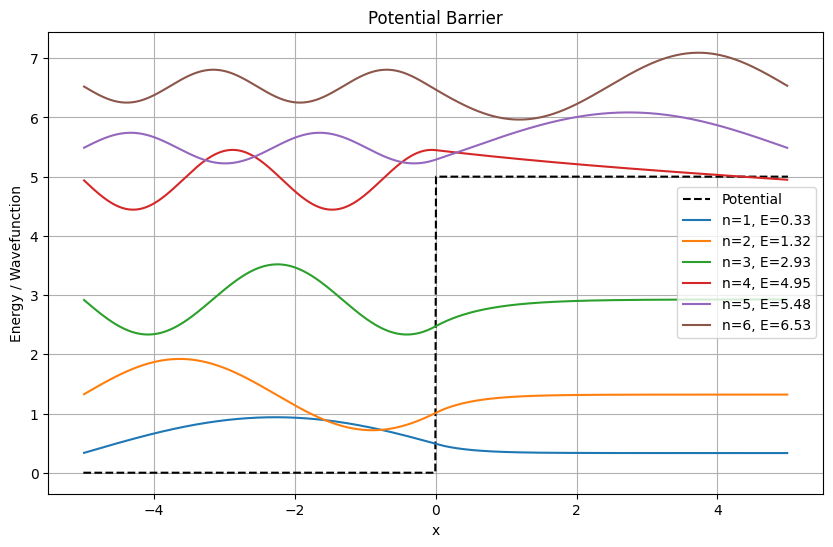

In [3]:
# Parameters
hbar = 1.0
m = 1.0
L = 10.0
N = 1000
x = np.linspace(-L/2, L/2, N)
dx = x[1] - x[0]

# Potential step
V_step = np.zeros(N)
x0 = 0.0  # Location of the step
V0_step = 5.0  # Height of the step
V_step[x >= x0] = V0_step  # Add the step
V = V_step

# Hamiltonian
H = np.zeros((N, N))
for i in range(1, N-1):
    H[i, i] = 2.0 / dx**2 + V[i]
    H[i, i-1] = H[i, i+1] = -1.0 / dx**2

# Solve the eigenvalue problem
E, psi = eigh(H[1:-1, 1:-1])

# Normalization of the wavefunctions
psi = psi / np.sqrt(dx)

# Plots
plt.figure(figsize=(10, 6))
plt.plot(x, V, label="Potential", color="black", linestyle="--")

for i in range(6):
    plt.plot(x[1:-1], psi[:, i] + E[i], label=f"n={i+1}, E={E[i]:.2f}")

plt.xlabel("x")
plt.ylabel("Energy / Wavefunction")
plt.legend()
plt.title("Potential Barrier")
plt.grid()
plt.show()


## Potential Barrier

The time-independent Schrödinger equation for a particle of mass $m$ in a potential $V(x)$ is given by:


$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)
$$

For a potential barrier at $0 \leq x \leq a$ with $V(x)$ defined as:


$$
V(x) =
\begin{cases}
0 & \text{for } x < 0 \\
V_0 & \text{for } 0 \leq x \leq a \\
0 & \text{for } x > a
\end{cases}
$$



we consider three regions:
- Region I: $x < 0$
- Region II: $0 \leq x \leq a$
- Region III: $x > a$

### Region I ($x < 0$):

The Schrödinger equation in this region is:


$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} = E\psi(x)
$$


which simplifies to:


$$
\frac{d^2 \psi(x)}{dx^2} + k_1^2 \psi(x) = 0
$$


where $k_1 = \sqrt{\frac{2mE}{\hbar^2}}$. The general solution in Region I is:


$$
\psi_I(x) = A e^{ik_1x} + B e^{-ik_1x}
$$



### Region II ($0 \leq x \leq a$):

The Schrödinger equation in this region is:


$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V_0 \psi(x) = E\psi(x)
$$


which simplifies to:


$$
\frac{d^2 \psi(x)}{dx^2} + k_2^2 \psi(x) = 0
$$


where $k_2 = \sqrt{\frac{2m(E-V_0)}{\hbar^2}}$. The general solution in Region II is:


$$
\psi_{II}(x) = C e^{ik_2x} + D e^{-ik_2x}
$$



### Region III ($x > a$):

The Schrödinger equation in this region is:

$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} = E\psi(x)
$$


which simplifies to:


$$
\frac{d^2 \psi(x)}{dx^2} + k_1^2 \psi(x) = 0
$$


where $k_1 = \sqrt{\frac{2mE}{\hbar^2}}$. The general solution in Region III is:


$$
\psi_{III}(x) = F e^{ik_1x} + G e^{-ik_1x}
$$



### Boundary Conditions:

At $x = 0$ and $x = a$, the wave functions and their derivatives must be continuous:


$$
\psi_I(0) = \psi_{II}(0)
$$




$$
\left. \frac{d\psi_I}{dx} \right|_{x=0} = \left. \frac{d\psi_{II}}{dx} \right|_{x=0}
$$




$$
\psi_{II}(a) = \psi_{III}(a)
$$


$$
\left. \frac{d\psi_{II}}{dx} \right|_{x=a} = \left. \frac{d\psi_{III}}{dx} \right|_{x=a}
$$



By solving these boundary conditions, we can determine the coefficients $A$, $B$, $C$, $D$, $F$, and $G$.

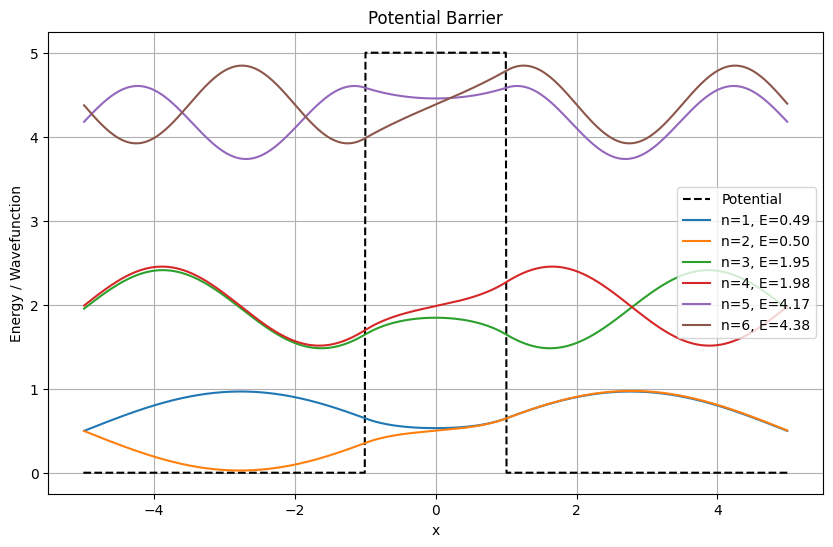

In [ ]:
# Parameters
hbar = 1.0
m = 1.0
L = 10.0
N = 1000
x = np.linspace(-L/2, L/2, N)
dx = x[1] - x[0]

V_barrier = np.zeros(N)
a, b = -1.0, 1.0
V0_barrier = 5.0
V_barrier[(x >= a) & (x <= b)] = V0_barrier

V = V_barrier

H = np.zeros((N, N))
for i in range(1, N-1):
    H[i, i] = 2.0 / dx**2 + V[i]
    H[i, i-1] = H[i, i+1] = -1.0 / dx**2

E, psi = eigh(H[1:-1,1:-1])

psi = psi / np.sqrt(dx)

# Plots
plt.figure(figsize=(10, 6))
plt.plot(x, V, label="Potential", color="black", linestyle="--")

for i in range(6):
    plt.plot(x[1:-1], psi[:, i] + E[i], label=f"n={i+1}, E={E[i]:.2f}")

plt.xlabel("x")
plt.ylabel("Energy / Wavefunction")
plt.legend()
plt.title("Potential Barrier")
plt.grid()
plt.show()


## Infinite Square Well

The time-independent Schrödinger equation for a particle of mass $m$ in a potential $V(x)$ is given by:

$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)
$$



For an infinite square well with $V(x)$ defined as:


$$
V(x) =
\begin{cases}
0 & \text{for } 0 \leq x \leq L \\
\infty & \text{otherwise}
\end{cases}
$$



we consider the region $0 \leq x \leq L$ where the potential is zero ($V(x) = 0$).

In this region, the Schrödinger equation simplifies to:


$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} = E\psi(x)
$$


which can be rewritten as:


$$
\frac{d^2 \psi(x)}{dx^2} + k^2 \psi(x) = 0
$$


where $k = \sqrt{\frac{2mE}{\hbar^2}}$.

The general solution to this differential equation is:


$$
\psi(x) = A \sin(kx) + B \cos(kx)
$$



### Boundary Conditions:

The wave function must satisfy the boundary conditions:


$$
\psi(0) = 0
$$




$$
\psi(L) = 0
$$



Applying the boundary condition $\psi(0) = 0$:


$$
A \sin(0) + B \cos(0) = 0 \implies B = 0
$$



So the wave function simplifies to:


$$
\psi(x) = A \sin(kx)
$$



Applying the boundary condition $\psi(L) = 0$:


$$
A \sin(kL) = 0
$$



For non-trivial solutions ($A \neq 0$), we must have:


$$
\sin(kL) = 0 \implies kL = n\pi \quad \text{where} \quad n = 1, 2, 3, \ldots
$$



Therefore, the wave numbers are:


$$
k = \frac{n\pi}{L}
$$



The corresponding energy eigenvalues are:


$$
E_n = \frac{\hbar^2 k^2}{2m} = \frac{\hbar^2}{2m} \left( \frac{n\pi}{L} \right)^2 = \frac{n^2 \pi^2 \hbar^2}{2mL^2} \quad \text{where} \quad n = 1, 2, 3, \ldots
$$

The normalized wave functions are:

$$
\psi_n(x) = \sqrt{\frac{2}{L}} \sin\left( \frac{n\pi x}{L} \right) \quad \text{where} \quad n = 1, 2, 3, \ldots
$$

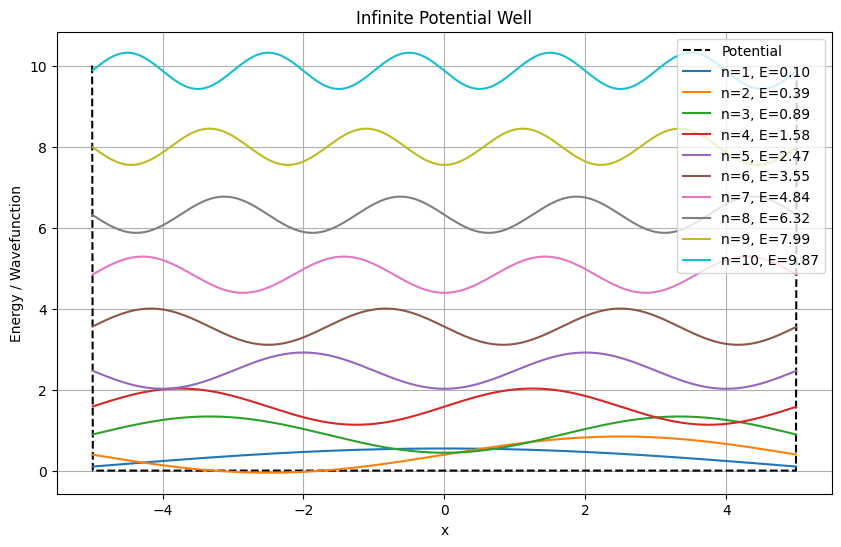

In [ ]:
# Parameters
hbar = 1.0
m = 1.0
L = 10.0
N = 1000
x = np.linspace(-L/2, L/2, N)
dx = x[1] - x[0]

V = np.zeros(N)
V[0] = V[-1] = 10


H = np.zeros((N, N))
for i in range(1, N-1):
    H[i, i] = 2.0 / dx**2 + V[i]
    H[i, i-1] = H[i, i+1] = -1.0 / dx**2

E, psi = eigh(H[1:-1,1:-1])

psi = psi / np.sqrt(dx)

# Plots
plt.figure(figsize=(10, 6))
plt.plot(x, V, label="Potential", color="black", linestyle="--")

for i in range(10):
    plt.plot(x[1:-1], psi[:, i] + E[i], label=f"n={i+1}, E={E[i]:.2f}")

plt.xlabel("x")
plt.ylabel("Energy / Wavefunction")
plt.legend()
plt.title("Infinite Potential Well")
plt.grid()
plt.show()


## Linear Harmonic Oscillator

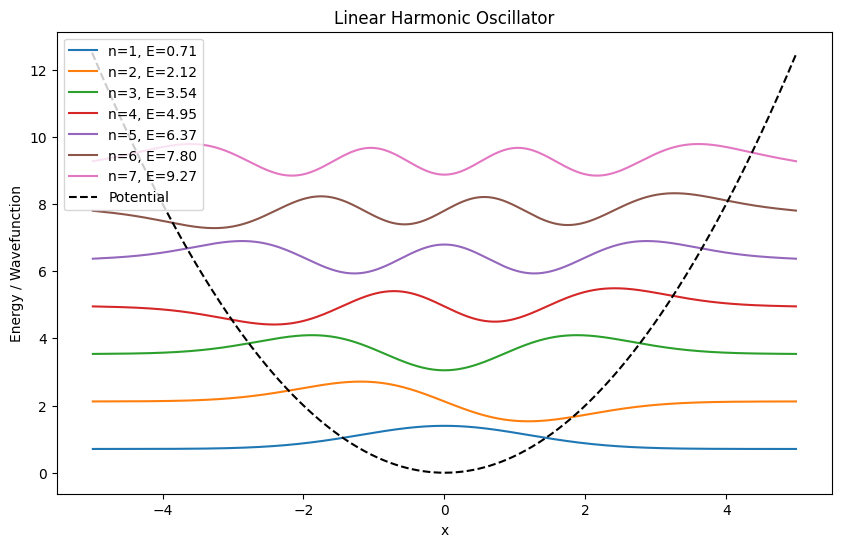

In [ ]:
# Parameters
hbar = 1.0
m = 1.0
L = 10.0
N = 1000
x = np.linspace(-L/2, L/2, N)
dx = x[1] - x[0]


V = 0.5 * m * (x**2)

H = np.zeros((N, N))
for i in range(1, N-1):
    H[i, i] = 2.0 / dx**2 + V[i]
    H[i, i-1] = H[i, i+1] = -1.0 / dx**2

H[0, 0] = H[-1, -1] = 1e10

E, psi = eigh(H[1:-1,1:-1])
psi = psi / np.sqrt(dx)

# Plots
plt.figure(figsize=(10, 6))
for i in range(7):
    plt.plot(x[1:-1], psi[:, i] + E[i], label=f"n={i+1}, E={E[i]:.2f}")


plt.plot(x, V, label="Potential", color="black", linestyle="--")
plt.xlabel("x")
plt.ylabel("Energy / Wavefunction")
plt.legend()
plt.title("Linear Harmonic Oscillator")
plt.show()

## Periodic Potential

The time-independent Schrödinger equation for a particle of mass $m$ in a periodic potential $V(x)$ is given by:


$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)
$$



For a periodic potential $V(x)$ with period $a$, i.e., $V(x + a) = V(x)$, we use Bloch's theorem, which states that the wave functions $\psi(x)$ can be written as:


$$
\psi_k(x) = e^{ikx} u_k(x)
$$


where $u_k(x)$ has the same periodicity as the potential, $u_k(x + a) = u_k(x)$, and $k$ is the wave vector.

### Bloch's Theorem:

Substituting $\psi_k(x) = e^{ikx} u_k(x)$ into the Schrödinger equation, we get:


$$
-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} \left( e^{ikx} u_k(x) \right) + V(x)e^{ikx} u_k(x) = Ee^{ikx} u_k(x)
$$



Expanding the second derivative term, we have:


$$
-\frac{\hbar^2}{2m} \left[ \left( \frac{d^2 u_k(x)}{dx^2} + 2ik \frac{d u_k(x)}{dx} - k^2 u_k(x) \right) e^{ikx} \right] + V(x)e^{ikx} u_k(x) = Ee^{ikx} u_k(x)
$$



Dividing through by $e^{ikx}$, we obtain:


$$
-\frac{\hbar^2}{2m} \left( \frac{d^2 u_k(x)}{dx^2} + 2ik \frac{d u_k(x)}{dx} - k^2 u_k(x) \right) + V(x)u_k(x) = Eu_k(x)
$$



Rearranging the terms, we get:


$$
-\frac{\hbar^2}{2m} \frac{d^2 u_k(x)}{dx^2} + \left( V(x) + \frac{\hbar^2 k^2}{2m} \right) u_k(x) - i\hbar k \frac{d u_k(x)}{dx} = Eu_k(x)
$$



This equation can be solved to find the energy bands $E(k)$ and the corresponding Bloch functions $u_k(x)$.

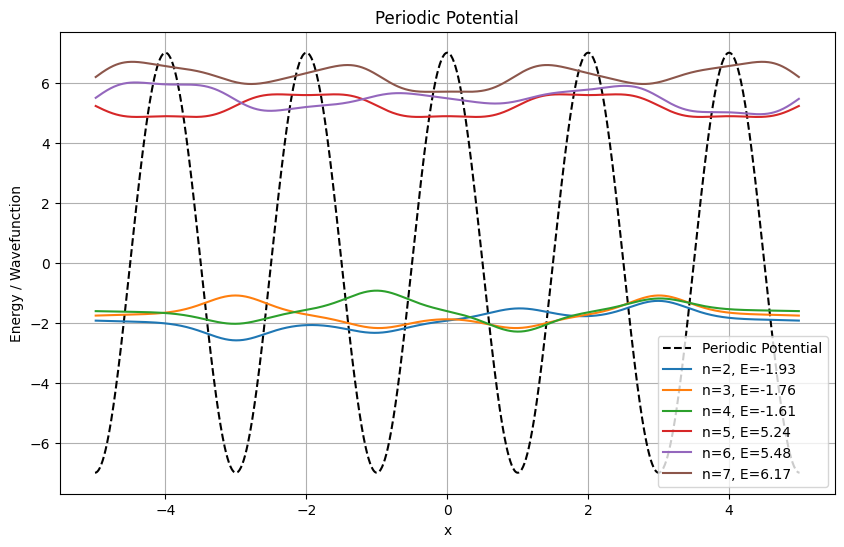

In [ ]:
# Parameters
hbar = 1.0
m = 1.0
L = 10.0
N = 1000
x = np.linspace(-L/2, L/2, N)
dx = x[1] - x[0]

a = 2.0  # Lattice constant (period)
V0 = 7.0  # Amplitude of the periodic potential
V = V0 * np.cos(2 * np.pi * x / a)


H = np.zeros((N, N))
for i in range(1, N-1):
    H[i, i] = 2.0 / dx**2 + V[i]
    H[i, i-1] = H[i, i+1] = -1.0 / dx**2

E, psi = eigh(H[1:-1,1:-1])

psi = psi / np.sqrt(dx)

# Plots
plt.figure(figsize=(10, 6))
plt.plot(x, V, label="Periodic Potential", color="black", linestyle="--")
for i in range(1, 7):
    plt.plot(x[1:-1], psi[:, i] + E[i], label=f"n={i+1}, E={E[i]:.2f}")

plt.xlabel("x")
plt.ylabel("Energy / Wavefunction")
plt.legend()
plt.title("Periodic Potential")
plt.grid()
plt.show()
